In [171]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv("datasets/clean_snacks.csv")

In [6]:
df.head()

,country_region,office_department_city,description,warehouse_city,category_name,brand_id,price_type,product_id,plant,client_id,flavor_name,client_name,point_of_sale_name,distributor,date,units,devolution_units,sale_discount,sale_devolution
0,Sur,Cali,TULUA,TULUA,Producto de Extrusion,M01,OFERTADO,53407164,P1,16359356,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,324,0,"-32,675.40",0
1,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,OFERTADO,53407164,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,36,0,"-4,437.40",0
2,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,REGULAR,53102174,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,73200,0,"-20,069.98",0
3,Sur,Cali,AGUABLANCA - CALI,SUR,Producto de Extrusion,M01,OFERTADO,53408215,P1,94456173,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,1080,0,"-108,918.43",0
4,Sur,Cali,AUTOSERVICIOS CALI,NORTE,Producto de Extrusion,M01,OFERTADO,53408024,P1,8050279707,TRADICIONAL,NaN,NaN,Superficies Menores,1/04/2014,100,40,"-10,992.00","-29,312.00"


In [47]:
df.isna().sum()

country_region                0
office_department_city        0
description                1016
warehouse_city                0
category_name                 0
brand_id                      0
price_type                    0
product_id                    0
plant                         0
client_id                     0
flavor_name                   0
client_name               38181
point_of_sale_name        38181
distributor                   0
date                          0
units                         0
devolution_units              0
sale_discount                 0
sale_devolution               0
dtype: int64

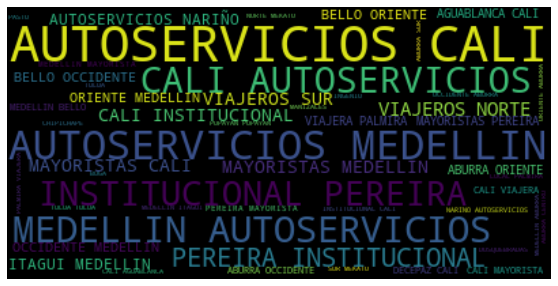

In [48]:
text = ' '.join(df["description"].dropna())
wordcloud = WordCloud(max_font_size=60, max_words=50, background_color="black").generate(text)
plt.figure(figsize=(16, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

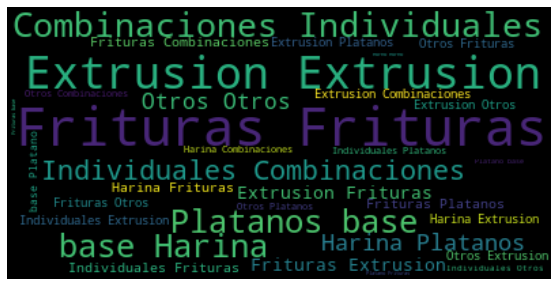

In [96]:
categories = df["category_name"].dropna().values
text = ' '.join(categories).replace("Producto", "").replace("de", "").replace("en", "")
wordcloud = WordCloud(max_font_size=60, max_words=200, background_color="black").generate(text)
plt.figure(figsize=(16, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [198]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = df.sort_values(by='date')
df['month_year'] = df['date'].apply(lambda x: x.strftime("%Y-%m"))
df = df[df["office_department_city"] != "No Aplica"]

In [239]:
def stackbar(x, y, kind=None, top=None):
    sns.set_style("dark")
    crosstab = pd.crosstab(df[x], df[y])
    if kind:
        for categories, data in df.groupby([x, y]):
            a, b = categories
            crosstab.loc[a, b] = data[kind].sum()

        crosstab = crosstab.loc[:, df[y].value_counts().index[:top]]
        
    plt_prop = crosstab.plot(kind='bar', stacked=True, width=1, figsize=(12, 6))
    plt_prop.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.grid(axis="y")

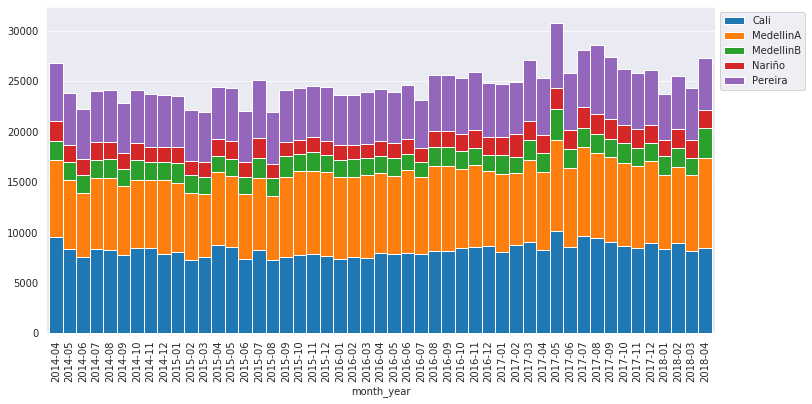

In [241]:
stackbar("month_year", "office_department_city")

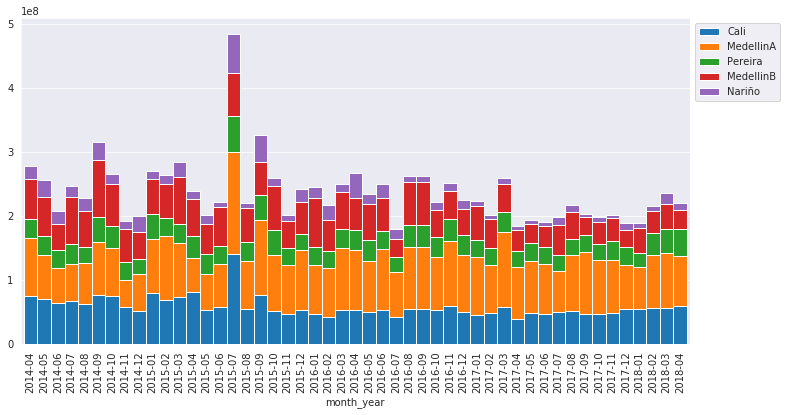

In [240]:
stackbar("month_year", "office_department_city", "units", 5)

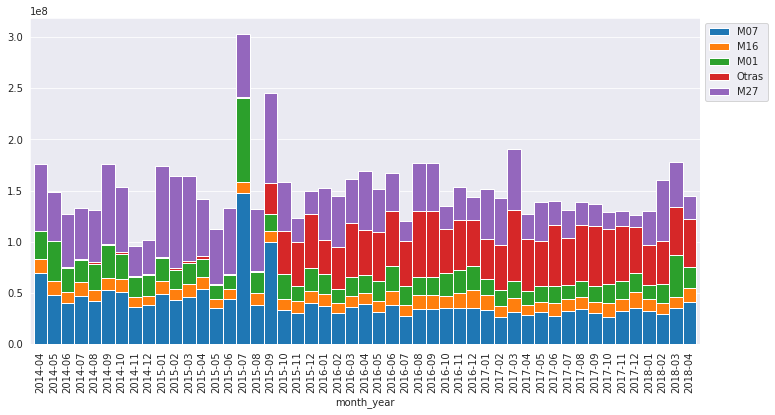

In [242]:
stackbar("month_year", "brand_id", "units", 5)

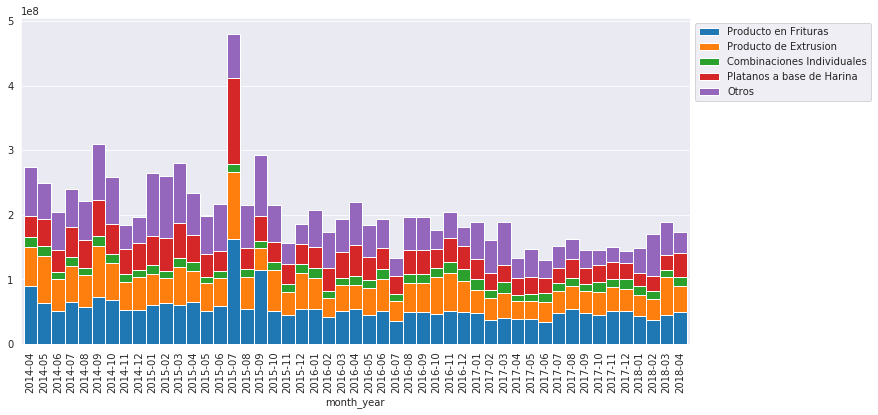

In [243]:
stackbar("month_year", "category_name", "units", 5)